# 데이터를 한눈에 주요 시각화 그래프
------------------------------------

# 목차
----------------------------------------------------------
🖋️ 학습목표

4.1 데이터 종류
* 4.1.1 수치형데이터
* 4.1.2 범주형데이터

4.2 탐색적 데이터

4.3 수치형 데이터 시각화
* 4.3.1 히스토그램(histplot)
* 4.3.2 커널밀도추정 함수그래프(kdeplot)
* 4.3.2 분포도(distplot)
* 4.3.2 러그플롯(rugplot)

4.4 범주형 데이터 시각화
* 4.4.1 막대그래프(barplot)
* 4.4.2 포인트 플롯(pointplot)
* 4.4.3 박스플롯(boxplot)
* 4.4.4 바이올린플롯(violinplot)
* 4.4.5 카운트플롯(countplot)
* 4.4.6 파이그래프(pie)
  
4.5 데이터 관계 시각화
* 4.5.1 히트맵(heatmap)
* 4.5.2 라인플롯(lineplot)
* 4.5.3 산점도(scatterplot)
* 4.5.4 회귀선을 포함한 산점도 그래프(regplot)
----------------------------------------------------------

## 시각화를 위한 기본 세팅
----------------------------------------------------------


In [2]:
# 상시 적용 모듈
#---------------------
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# 그외 필요 모듈
#---------------------
import csv
import json
import requests
from bs4 import BeautifulSoup
from tqdm import tqdm

In [3]:
# 한글폰트세팅
#---------------------
import matplotlib
import matplotlib.font_manager as fm
font_location = "C:\\Windows\\Fonts\\Malgun.ttf"
font_name = fm.FontProperties(fname=font_location).get_name()
matplotlib.rc('font',family=font_name)

In [61]:
# sns 테마설정
#---------------------
sns.set_theme(style='whitegrid')

In [9]:
# 샘플 데이터 프레임 생성(1)
#---------------------
titanic_data = sns.load_dataset('titanic')
titanic_data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [37]:
# 샘플 데이터 프레임 생성(2)
#---------------------
flights_data = sns.load_dataset('flights')
flights_data.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [63]:
# 샘플 데이터 프레임 생성(3)
#---------------------
tips_data = sns.load_dataset('tips')
tips_data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## 4.3 수치형 데이터 시각화
----------------------------------------------------------

#### 4.3.1 히스토그램(histplot)
----------------------------------------------------------
* 히스토그램은 `수치형 데이터`의 구간별 빈도수를 나타내는 그래프
* x에 수치확인용 컬럼을 넣고 확인가능
* bins에 막대의 구간길이를 설정할수 있음
* hue 에 범주형 데이터를 전달하여 그래프를 표현할 수도 있음
* multiple로 그래프 바의 누적표현이 가능
* kde 옵션을 True로 할경우 커널밀도추정 함수 그래프를 표시하는것이 가능

<Axes: xlabel='age', ylabel='Count'>

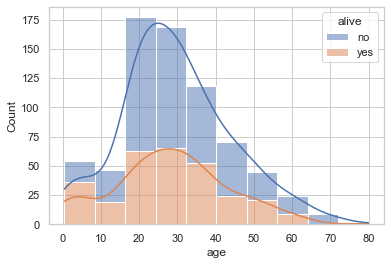

In [15]:
sns.histplot(
                data=titanic_data, 
                x='age', 
                bins=10, 
                hue='alive',
                multiple='stack', 
                kde=True,
            )

#### 4.3.2 커널밀도추정 함수그래프(kdeplot)
----------------------------------------------------------
* 히스토그램을 매끄럽게 곡선으로 연결한 그래프

<Axes: xlabel='age', ylabel='Density'>

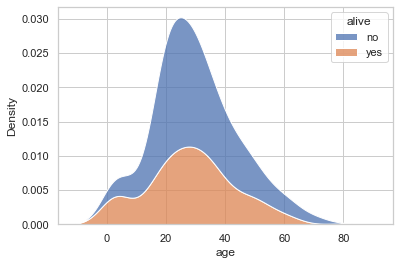

In [18]:
sns.kdeplot(
                data=titanic_data, 
                x='age', 
                hue='alive',
                multiple='stack', 
            )

#### 4.3.3 분포도(displot)
----------------------------------------------------------
* 분포도 역시  `수치형 데이터`를 나타내는 그래프
* 파라미터 조정시 히스토그램과 커널밀도추정함수 그래프 모두 표현 가능



c:\anaconda3\envs\EDA\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


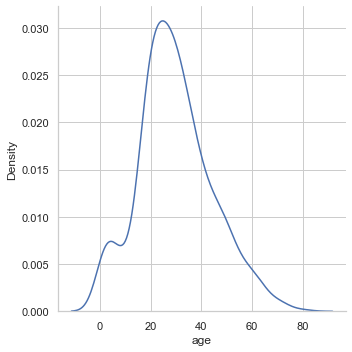

In [20]:
sns.displot(
                data=titanic_data, 
                x='age', 
                kind='kde',
            )

c:\anaconda3\envs\EDA\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


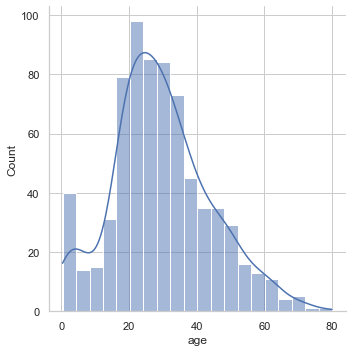

In [21]:
sns.displot(
                data=titanic_data, 
                x='age', 
                kde=True,
            )

#### 4.3.1 러그플롯(rugplot)
----------------------------------------------------------
* 러그플롯은 `주변의분포`를 나타내는 그래프
* 주로 다른 그래프와 함께 사용

<Axes: xlabel='age', ylabel='Density'>

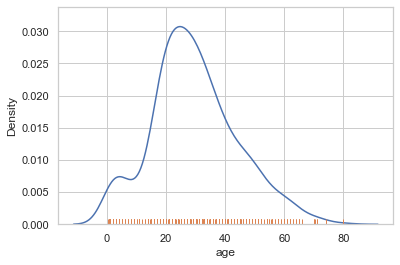

In [22]:
sns.kdeplot(
                data=titanic_data, 
                x='age', 
           )
sns.rugplot(
                data=titanic_data, 
                x='age', 
           )

## 4.4 범주형 데이터 시각화
----------------------------------------------------------

#### 4.4.1 막대그래프(barplot)
----------------------------------------------------------
* 막대그래프는 `범주형 데이터의 값에따라 수치형 데이터의 값`이 어떻게 달라지는지 파악할때 사용 하는 그래프
* x에 범주형 컬럼을
* y에 수치형 컬럼을 넣고 비교


<Axes: xlabel='class', ylabel='fare'>

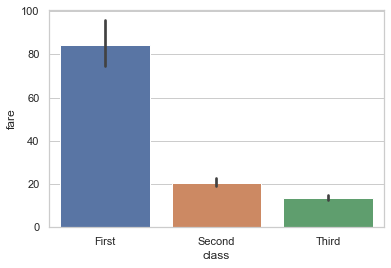

In [26]:
sns.barplot(    
                data=titanic_data,
                x = 'class', # 범주형
                y = 'fare',  # 수치형
           )

#### 4.4.2 포인트플롯(pointplot)
----------------------------------------------------------
* 막대그래프와 동일한 정보를 제공하나, 그래프를 점과 선으로 표현하는정도의 차이가 있음
* 한 화면에 여러 그래프를 그릴때 유용함

<Axes: xlabel='class', ylabel='fare'>

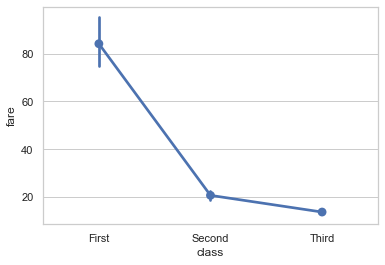

In [38]:
sns.pointplot(    
                data=titanic_data,
                x = 'class', # 범주형
                y = 'fare',  # 수치형
           )

<Axes: xlabel='year', ylabel='passengers'>

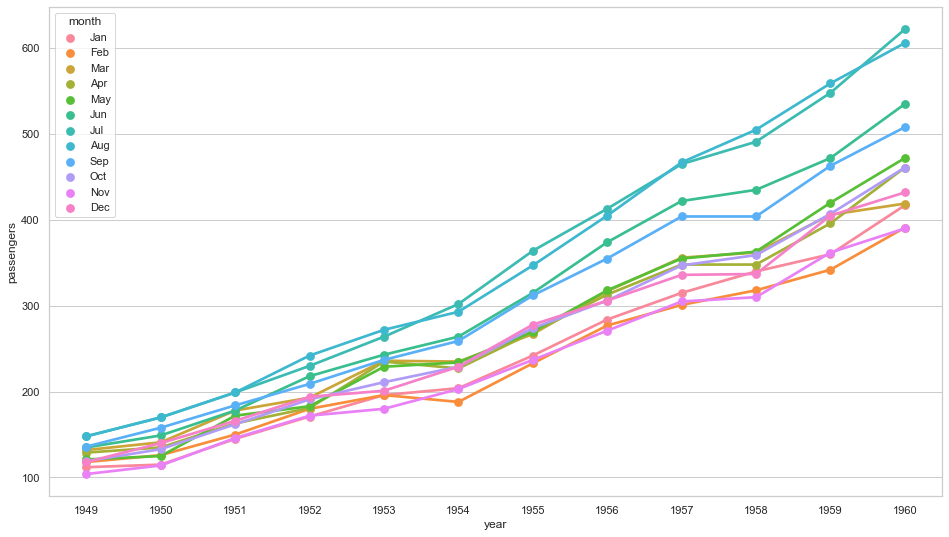

In [51]:
plt.figure(figsize=(16, 9))
sns.pointplot(    
                data=flights_data,
                x = 'year', # 범주형
                y = 'passengers',
                hue = 'month',  # 수치형
           )


#### 4.4.3 박스플롯(boxplot)
----------------------------------------------------------
* 박스플롯은 앞의 막대나 포인트 그래프보다 더 많은 정보를 제공(5가지요약수치)
* 5가지 요약수치
  * 제1사분위수(Q1)
  * 제2사분위수(Q2)
  * 제3사분위수(Q3)
  * 제1사분위수(IQR) : Q3 - Q1
  * 최대값(max) : Q3 +(1.5 * IQR)
  * 최솟값(min) : Q1 +(1.5 * IQR)
  * 이상치 : 최대값보다 크거나 최솟값보다 작은값

<figure style='text-align: left;'>
    <p style='text-align: left;'>박스플롯 이미지</p>
    <img src="./image/ch3_boxplot_image.jpg">
</figure>


<Axes: xlabel='class', ylabel='age'>

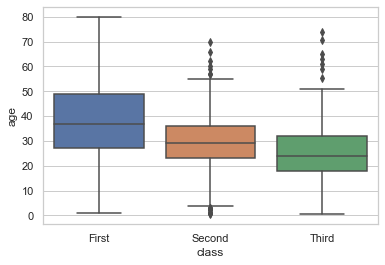

In [52]:
sns.boxplot(    
                data=titanic_data,
                x = 'class', # 범주형
                y = 'age',  # 수치형
           )

#### 4.4.4 바이올린플롯(violinplot)
----------------------------------------------------------
* 바이올린플롯은 박스플롯과 kde를 합친 그래프
* 모양은 kde의 모양이며, 박스 플롯의 정보를 모두 포함함

<figure style='text-align: left;'>
    <p style='text-align: left;'>바이올린플롯 이미지</p>
    <img src="./image/ch3_violinplot_image.png" width='640' height='480'>
</figure>


<Axes: xlabel='class', ylabel='age'>

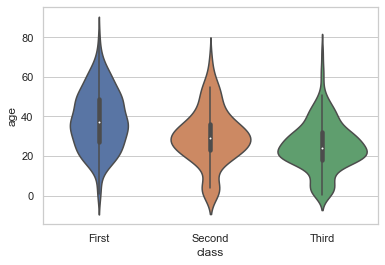

In [54]:
sns.violinplot(    
                data=titanic_data,
                x = 'class', # 범주형
                y = 'age',  # 수치형
           )

#### 박스플롯(boxplot) vs 바이올린플롯(violinplot)
----------------------------------------------------------
* 박스플롯과 비교할때 
* 범주별로 5가지 요약 = 박스플롯(Win!)
* 수치데이터의 전체적인 분포양상 = 바이올린플롯(Win!)

<div style="display: flex; justify-content: space-between; align-items: center;">
    <div style="text-align: left; flex: 2;">
        <p>박스플롯</p>
        <img src="./image/ch3_boxplot_sample.png">
    </div>
    <div style="text-align: center; flex: 1;">
        <img src="./image/ch3_VS_sample_image.png" width='50' height='50'>    
    </div>
    <div style="text-align: right; flex: 2;">
        <p>바이올린플롯</p>
        <img src="./image/ch3_violinplot_sample.png">
    </div>
</div>


<Axes: xlabel='class', ylabel='age'>

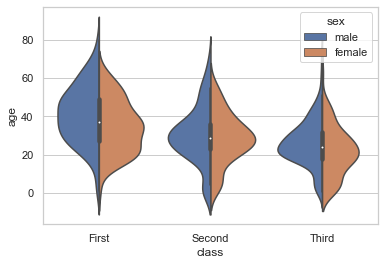

In [55]:
# 성별에 따른 등급별 나이 분포
#-----------------------------
sns.violinplot(    
                data=titanic_data,
                x = 'class', # 범주형
                y = 'age',  # 수치형
                hue = 'sex',
                split=True
           )

#### 4.4.5 카운트플롯(countplot)
----------------------------------------------------------
* 카운트플롯은 `범주형 데이터 의 갯수`를 확인할때 사용
* 주로 범주형 피처나 타깃값의 분포가 어떤지 파악하는 용도로 사용
* x축과 y축을 바꿔서 보는것도 가능
* y축은 범주형 데이터 갯수가 많을때, 그래프가 옆으로 너무 넓어져 보기 힘들때 주로 사용

<Axes: xlabel='class', ylabel='count'>

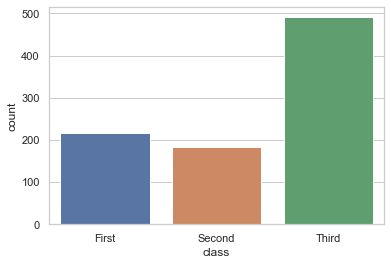

In [58]:
# x축 클래스 분포 그래프
#-----------------------------
sns.countplot(    
                data=titanic_data,
                x = 'class',
           )

<Axes: xlabel='count', ylabel='class'>

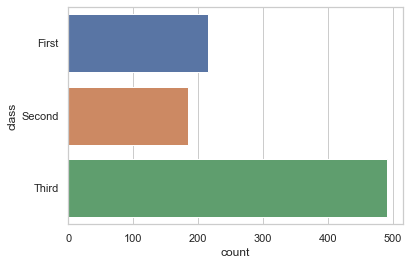

In [59]:
# y축 클래스 분포 그래프
#-----------------------------
sns.countplot(    
                data=titanic_data,
                y = 'class',
           )

#### 바플롯(barplot) vs 카운트플롯(countplot)
----------------------------------------------------------
* 바플롯은  두개의축(피쳐 두개)을 파라미터로 받음 
  * 수치형데이터의 평균을구해줌
  * 평균값 이외에 중앙값,최댓값,최솟값도 구할수있음
* 카운트플롯은 축을(피쳐 한개) 표현할때 범주형데이터 하나만 받음
    

#### 4.4.6 파이그래프(pie)
----------------------------------------------------------
* 파이그래프는 `범주형 데이터 의 비율`를 확인할때 사용

([<matplotlib.patches.Wedge at 0x1e2e22f06d0>,
 [Text(1.0461621663333946, 0.3399186987098808, 'A'),
  Text(-0.8899187482945419, 0.6465637025335369, 'B'),
  Text(0.6465639524941308, -0.8899185666875186, 'C')],
 [Text(0.5706339089091244, 0.1854101992962986, '10.0%'),
  Text(-0.4854102263424773, 0.3526711104728383, '60.0%'),
  Text(0.35267124681498035, -0.485410127284101, '30.0%')])

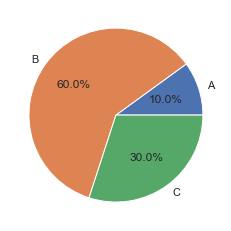

In [62]:
x = [10,60,30]
label = ['A','B','C']

plt.pie(
            x=x,
            labels=label,
            autopct='%.1f%%'
       )

## 4.5 데이터 관계 시각화
----------------------------------------------------------

#### 4.5.1 히트맵(hitmap)
----------------------------------------------------------
* 데이터간의 관계를 색상으로 표현한 그래프

In [ ]:
sns.heatmap(    

            )

#### 4.5.2 라인플롯(lineplot)
----------------------------------------------------------
* `두 수치형 데이터`의 관계를 나타낼때 사용


<Axes: xlabel='year', ylabel='passengers'>

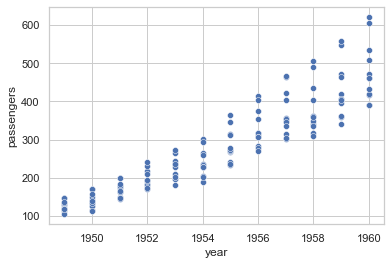

In [67]:
sns.scatterplot(    
                data=flights_data,
                x = 'year',
                y = 'passengers',
            )

#### 4.5.3 산점도(scatterplot)
----------------------------------------------------------
* 두 데이터의 관계를 점으로 표현하는 그래프


<Axes: xlabel='total_bill', ylabel='tip'>

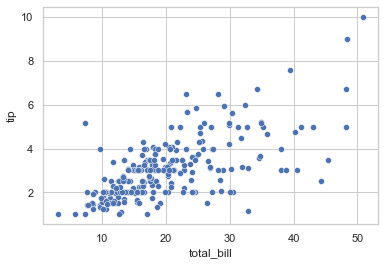

In [65]:
sns.scatterplot(    
                data=tips_data,
                x = 'total_bill',
                y = 'tip',
            )

#### 4.5.4 회귀선을 포함한 산점도 그래프(regplot)
----------------------------------------------------------
* regplot은 산점도와 선형회귀선을 동시에 그려주는 함수


<Axes: xlabel='total_bill', ylabel='tip'>

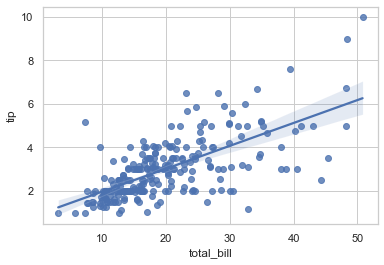

In [64]:
sns.regplot(    
                data=tips_data,
                x = 'total_bill',
                y = 'tip',
            )